In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

path = 'C:/Users/Pessoal/Documents/PowerBi/Teste_recrutamento/dados-gerais-das-reclamacoes-por-operadora.csv'
df = pd.read_csv( path, encoding='ANSI', sep=';')

In [2]:
#Limpar caracteres
def limparCaracteres(arq):
    cols = arq.columns.str.replace(' ','').str.replace('ç','c')\
    .str.replace('ã','a').str.replace('ú','u').str.replace('ê','e')\
    .str.replace('á','a')
    return cols

def SubstTitulo(titulo,df):
    titulo = df.columns.str.replace('SubtemaDemanda',titulo)
    return titulo

def limparAcento(campo, df):
    limpar = df[campo].str.replace('É','E').str.replace('Ã','A').str.replace('Ê','E').str.replace('Ç','C').str.replace('  ', ' ').str.replace('.',' ')\
    .str.replace('Í','I').str.replace('Á','A').str.replace('Ó','O').str.replace('Õ','O')\
    .str.replace('Ô','O').str.replace('À','A').str.replace('Ú','U')
    return limpar

In [3]:
#Chama função para limpar cabeçalho
cols = limparCaracteres(df)
df.columns = cols
#dataset.head(1)

In [4]:
#Remove os Beneficiarios ZERADOS
df.drop(df[df.Beneficiarios==0].index, inplace=True)

#Conta os Beneficiarios
QtdBen = pd.value_counts(df['Beneficiarios'])

In [5]:
#Troca cabeçalho SubtemaDemanda por Chamados
titulo = SubstTitulo('Reclamações',df)
df.columns = titulo
#df.head(1)

In [6]:
#Retira acentuação da coluna RazaSocial
limpar =limparAcento('RazaoSocial', df)

In [47]:
#Redefine os dados da coluna RazaoSocial
df['RazaoSocial'] = limpar

#df.info()

#Formata o campo para DATA
df['DataAtendimento'] = pd.to_datetime(df['DataAtendimento'])

In [48]:
razao = df.groupby(['RazaoSocial'])
tot = razao['NumeroDemanda'].size().sort_values(ascending=False).head(10)

In [49]:
tot.plot(kind='barh', color = 'red')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


In [50]:
#Operadoras com mais reclamações (Top 10)
numRecl = df.groupby(by='Reclamações').size().sort_values(ascending = False)
numRecl.head(20)

Reclamações
Gerenciamento das Ações de Saúde por Parte da Operadora (autorizações prévias, franquia, co-participação e outros)    45195
Suspensão e Rescisão Contratuais                                                                                      17889
Reembolso                                                                                                             14346
Rol de Procedimentos e Coberturas (geográfica e assistencial)                                                         14095
Rede de Atendimento (rede conveniada)                                                                                 10998
Prazos Máximos para Atendimento                                                                                        9164
Mensalidade ou Contraprestação Pecuniária                                                                              6306
Itens Obrigatórios e Cláusulas Contratuais                                                                             5

In [51]:
data_agrupada = df.groupby(df['DataAtendimento'].dt.year)
total = data_agrupada['NumeroDemanda'].size().sort_values(ascending=False)


<IPython.core.display.Javascript object>


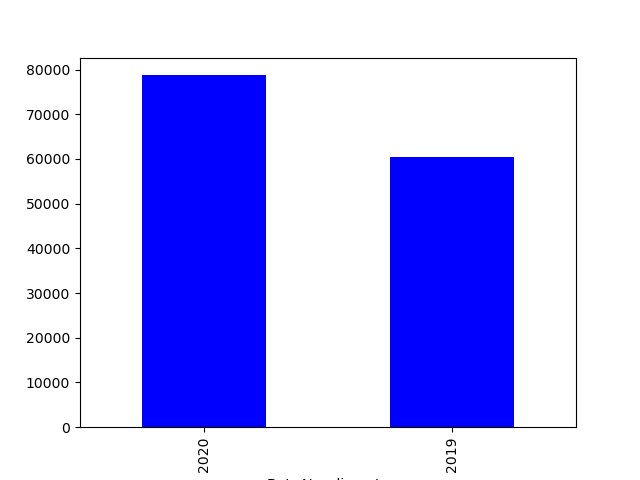

In [52]:
total.plot(kind='bar', color = 'b')